In [2]:
#importing libraries
import pandas as pd
import pypyodbc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

#connecting to sql server
server = 'LIELAH\SQLEXPRESS' 
database = 'foodDelivery'   
cnxn = pypyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database)
cursor = cnxn.cursor()
#sql query 
query = "SELECT * from foodDelivery;"
df = pd.read_sql(query, cnxn)
df.head()

c:\Users\smabh\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,delivery_person_id,delivery_person_age,delivery_person_ratings,order_date,time_orderd,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken,pickup_time,delivered_distance
0,0x7443,MUMRES17DEL01,23.0,4.8,2022-03-28,10:50:00.0000000,conditions Fog,Low,2,Buffet,scooter,1.0,False,Metropolitian,15,10.0,0.014142
1,0x3247,SURRES13DEL01,27.0,4.6,2022-03-18,22:45:00.0000000,conditions Sandstorms,Low,2,Drinks,scooter,1.0,False,Urban,19,15.0,0.155564
2,0xb467,MYSRES20DEL03,28.0,4.6,2022-03-31,20:00:00.0000000,conditions Cloudy,Jam,0,Snack,motorcycle,1.0,False,Metropolitian,46,10.0,0.127281
3,0x2307,MYSRES08DEL03,34.0,4.9,2022-03-13,18:30:00.0000000,conditions Cloudy,Medium,0,Buffet,motorcycle,1.0,False,Metropolitian,34,5.0,0.084851
4,0x5ff3,INDORES11DEL03,26.0,4.9,2022-03-03,22:10:00.0000000,conditions Cloudy,Low,1,Buffet,motorcycle,1.0,False,Metropolitian,19,10.0,0.042426


In [3]:
#datatype of columns
print(df.dtypes)
#getting columns with null values
print('         ---null data---')
print(df.isna().sum())
df.head()
#updating datatype of columns 
df['time_taken'] = df['time_taken'].astype(float)
df['delivered_distance'] = df['delivered_distance'].astype(float)
df['multiple_deliveries'] = df['multiple_deliveries'].astype(float)
#filling null values of columns
df.delivery_person_age = df.delivery_person_age.fillna(df.delivery_person_age.mean())
df.delivery_person_ratings = df.delivery_person_ratings.fillna(df.delivery_person_ratings.mean())
df.pickup_time = df.pickup_time.fillna(df.pickup_time.mode()[0])
df.city = df.city.fillna(df.city.mode()[0])
df.festival = df.festival.fillna(df.festival.mode()[0])
df.multiple_deliveries = df.multiple_deliveries.fillna(df.multiple_deliveries.mode()[0])
df.road_traffic_density = df.road_traffic_density.fillna(df.road_traffic_density.mode()[0])
#formating date-time
df['order_date'] =  pd.to_datetime(df['order_date'], format='%Y/%m/%d')
df['ordered_month'] = df['order_date'].dt.strftime('%m-%y')
#there are null values in date-time columns, its better to drop them
df = df.dropna()
#formating time type data
df['time_orderd'] = df['time_orderd'].astype(str)
df['time_orderd'] = df['time_orderd'].str.split('.').str[0]
df['time_orderd'] = pd.to_datetime(df['time_orderd'],format= '%H:%M:%S' ).dt.time
df.head()

id                          object
delivery_person_id          object
delivery_person_age        float64
delivery_person_ratings    float64
order_date                  object
time_orderd                 object
weather_conditions          object
road_traffic_density        object
vehicle_condition            int64
type_of_order               object
type_of_vehicle             object
multiple_deliveries        float64
festival                    object
city                        object
time_taken                  object
pickup_time                float64
delivered_distance         float64
dtype: object
         ---null data---
id                            0
delivery_person_id            0
delivery_person_age        1611
delivery_person_ratings    1660
order_date                    0
time_orderd                1456
weather_conditions            0
road_traffic_density        454
vehicle_condition             0
type_of_order                 0
type_of_vehicle               0
multiple_deliv

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,order_date,time_orderd,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken,pickup_time,delivered_distance,ordered_month
0,0x7443,MUMRES17DEL01,23.0,4.8,2022-03-28,10:50:00,conditions Fog,Low,2,Buffet,scooter,1.0,False,Metropolitian,15.0,10.0,0.014142,03-22
1,0x3247,SURRES13DEL01,27.0,4.6,2022-03-18,22:45:00,conditions Sandstorms,Low,2,Drinks,scooter,1.0,False,Urban,19.0,15.0,0.155564,03-22
2,0xb467,MYSRES20DEL03,28.0,4.6,2022-03-31,20:00:00,conditions Cloudy,Jam,0,Snack,motorcycle,1.0,False,Metropolitian,46.0,10.0,0.127281,03-22
3,0x2307,MYSRES08DEL03,34.0,4.9,2022-03-13,18:30:00,conditions Cloudy,Medium,0,Buffet,motorcycle,1.0,False,Metropolitian,34.0,5.0,0.084851,03-22
4,0x5ff3,INDORES11DEL03,26.0,4.9,2022-03-03,22:10:00,conditions Cloudy,Low,1,Buffet,motorcycle,1.0,False,Metropolitian,19.0,10.0,0.042426,03-22


In [4]:
#bucketing age
age_bucket = [18, 25, 30, 35, 40, 45]
df['ages'] = pd.cut(df['delivery_person_age'], age_bucket)
#grouping ages with count function
delivery_count = df.groupby(['ages']).count()
delivery_count = delivery_count['delivery_person_age']
delivery_count = delivery_count.to_frame('delivery_count')
delivery_count = delivery_count.reset_index()
delivery_count['ages'] = delivery_count['ages'].astype(str)
#and we get a dataframe with total delivery counts in each age group
delivery_count

,ages,delivery_count
0,"(18, 25]",12916
1,"(25, 30]",11070
2,"(30, 35]",10900
3,"(35, 40]",8820
4,"(40, 45]",0


In [5]:
#grouping city,type of vehicle with sum function
total_TimeAndDistance = df.groupby(['city','type_of_vehicle']).sum()
total_TimeAndDistance = total_TimeAndDistance.drop(['delivery_person_age','delivery_person_ratings','vehicle_condition','multiple_deliveries', 'festival','pickup_time'], axis =1)
total_TimeAndDistance = total_TimeAndDistance.reset_index()
#here we get the sum of time taken and delivered distance by each category of vehicle in each category of city
total_TimeAndDistance

,city,type_of_vehicle,time_taken,delivered_distance
0,Metropolitian,electric_scooter,68463.0,248.463187
1,Metropolitian,motorcycle,566359.0,1817.715520
2,Metropolitian,scooter,283305.0,1030.126651
3,Semi-Urban,electric_scooter,147.0,0.325266
4,Semi-Urban,motorcycle,7138.0,16.857426
5,Semi-Urban,scooter,474.0,1.541494
6,Urban,electric_scooter,17365.0,67.698326
7,Urban,motorcycle,131423.0,456.352260
8,Urban,scooter,74713.0,292.063220


In [6]:
#grouping city,type of vehicle with count function
totalVehicleCount = df.groupby(['city','type_of_vehicle']).count()
totalVehicleCount = totalVehicleCount.drop(['delivery_person_id', 'delivery_person_age',
       'delivery_person_ratings', 'order_date', 'time_orderd',
       'weather_conditions', 'road_traffic_density', 'vehicle_condition',
       'type_of_order', 'multiple_deliveries', 'festival', 'time_taken',
       'pickup_time', 'delivered_distance', 'ages','ordered_month'], axis =1)
totalVehicleCount = totalVehicleCount.reset_index()
#here we get the count of each category of vehicle in each category of city
totalVehicleCount

,city,type_of_vehicle,id
0,Metropolitian,electric_scooter,2709
1,Metropolitian,motorcycle,19989
2,Metropolitian,scooter,11133
3,Semi-Urban,electric_scooter,3
4,Semi-Urban,motorcycle,143
5,Semi-Urban,scooter,10
6,Urban,electric_scooter,808
7,Urban,motorcycle,5405
8,Urban,scooter,3506


In [7]:
#uploading dataframe to sql server
for index, row in delivery_count.iterrows():
    cursor.execute("INSERT INTO AgedDeliveryCount (ages, deliveriesCount) Values(?,?);", [row.ages, row.delivery_count])
cnxn.commit()
for index, row in total_TimeAndDistance.iterrows():
    cursor.execute("INSERT INTO  totalTimeAndDistance(city, typeOfVehicles, timeTaken, deliveredDistance) Values(?,?,?,?);", 
    [row.city,row.type_of_vehicle,row.time_taken,row.delivered_distance])
cnxn.commit()
for index, row in totalVehicleCount.iterrows():
    cursor.execute("INSERT INTO totalVehiclesCount (city,typeOfVehicles, cnt) Values(?,?,?);", [row.city, row.type_of_vehicle,row.id])
cnxn.commit()
cursor.close()


In [7]:
#getting dummies for categorical columns
city_df     = pd.get_dummies(df['city'], drop_first= True)
festival_df = pd.get_dummies(df['festival'], drop_first= True)
vehicle_df  = pd.get_dummies(df['type_of_vehicle'], drop_first= True)
order_df    = pd.get_dummies(df['type_of_order'], drop_first= True)
traffic_density_df = pd.get_dummies(df['road_traffic_density'], drop_first= True)
weather_df  = pd.get_dummies(df['weather_conditions'], drop_first= True)
#concating and dropping
df = pd.concat([df,city_df,festival_df,vehicle_df,order_df,traffic_density_df,weather_df], axis = 1)
df = df.drop(['delivery_person_id',
       'order_date', 'time_orderd', 'weather_conditions', 'road_traffic_density',
        'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city',
       'ordered_month', 'ages'], axis = 1)
df = df.set_index('id')
df.head()

,delivery_person_age,delivery_person_ratings,vehicle_condition,time_taken,pickup_time,delivered_distance,Semi-Urban,Urban,True,motorcycle,...,Meal,Snack,Jam,Low,Medium,conditions Fog,conditions Sandstorms,conditions Stormy,conditions Sunny,conditions Windy
id,,,,,,,,,,,,,,,,,,,,,
0x7443,23.0,4.8,2,15.0,10.0,0.014142,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
0x3247,27.0,4.6,2,19.0,15.0,0.155564,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
0xb467,28.0,4.6,0,46.0,10.0,0.127281,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
0x2307,34.0,4.9,0,34.0,5.0,0.084851,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
0x5ff3,26.0,4.9,1,19.0,10.0,0.042426,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [26]:
#importing models
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor
#creating datasets for regression
X = df.drop(['time_taken'], axis = 1)
y = df['time_taken']
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104, test_size=0.05, shuffle=True)
X_train.shape, X_test.shape, y_train.shape ,y_test.shape


((39335, 21), (4371, 21), (39335,), (4371,))

In [28]:
import xgboost as xgb
#importing and fitting the models
xgb_regr = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.1, max_depth = 5,n_estimators = 500)
xgb_regr.fit(X_train,y_train)
#predicting from the model
y_pred = xgb_regr.predict(X_test)
#obtaining r2_score
score  = r2_score(y_test,y_pred)
print("Score with model-",score)

Score with model- 0.8180920942300374


In [29]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn import ensemble
#importing and fitting the models
Hist_gbr = HistGradientBoostingRegressor(learning_rate=0.1, max_iter = 900, max_depth=9).fit(X_train, y_train)
#predicting from the model
y_pred = Hist_gbr.predict(X_test)
#obtaining r2_score
score = r2_score(y_test,y_pred)
print("Score with model-",score)


Score with model- 0.8243761251534485


In [30]:

Bagging_regr = BaggingRegressor(n_estimators = 500, random_state = 0)
Bagging_regr.fit(X_train,y_train)

BaggingRegressor(n_estimators=500, random_state=0)

In [31]:
y_pred = Bagging_regr.predict(X_test)
score  = r2_score(y_test,y_pred)
print("Score with model-",score)

Score with model- 0.8176756642427687


error margine model- 15.196083333333334


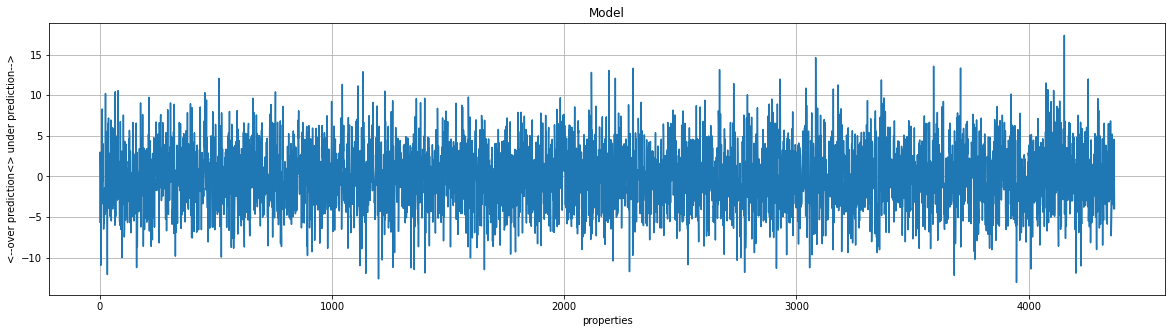

In [32]:
error = []
for i in range(len(y_test)):
    er = (y_test[i] - y_pred[i])
    error.append(er)
print("error margine model-", (max(error)-min(error))/2)
plt.figure(figsize=(20,5))
plt.plot(error)
plt.title("Model")
plt.ylabel("<--over prediction<> under prediction-->")
plt.xlabel("properties")
plt.grid()